## Luis Seguro

# Introdução a Data Science com Python

A base de dados escolhida é sobre as aplicações da Google Play Store contendo dados como o nome da app, número de instalações, género de aplicação, rating dado pelos users, número de reviews, tamanho da app, preço, restrições de conteúdo da app entre outras.

**Objetivo:** Analisar tendências e os maiores sucessos na Google Play Store.
**Base de dados:** googleplaystore.csv adquirida a partir do site Kaggle.

A primeira análise feita foi ao género de aplicações e ao número de instalações.

In [10]:
# Imports and fix for warning
import pandas as pd
from heapq import nlargest
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [11]:
# Reading data and initializing dictionary
apps_data = pd.read_csv(r'C:\ProjetoIDS\googleplaystore.csv')
apps_data.head()

genres_installs = {}

In [12]:
# Removing "," and "+" from the Installs data so we can use them
for i in range(len(apps_data["Installs"])):
    apps_data["Installs"][i] = apps_data["Installs"][i].replace(',','')
    apps_data["Installs"][i] = apps_data["Installs"][i].replace('+', '')

In [13]:
# Turning Genre and Installs data into a dictionary to be analysed
for i in range(len(apps_data["Installs"])):
    if not apps_data["Genres"][i] in genres_installs:
        # to fix misplaced data
        if not(apps_data["Installs"][i] == "Free"):
            genres_installs[apps_data["Genres"][i]] = int(apps_data["Installs"][i])
    else:
        genres_installs[apps_data["Genres"][i]] += int(apps_data["Installs"][i])

In [14]:
# Saving the top5 into a new dictionary
genres_installs = {j:i for i,j in genres_installs.items()}
top_five = dict(nlargest(5, genres_installs.items()))
top_five = {z:y for y,z in top_five.items()}

genre = list(top_five.keys())
installs = list(top_five.values())

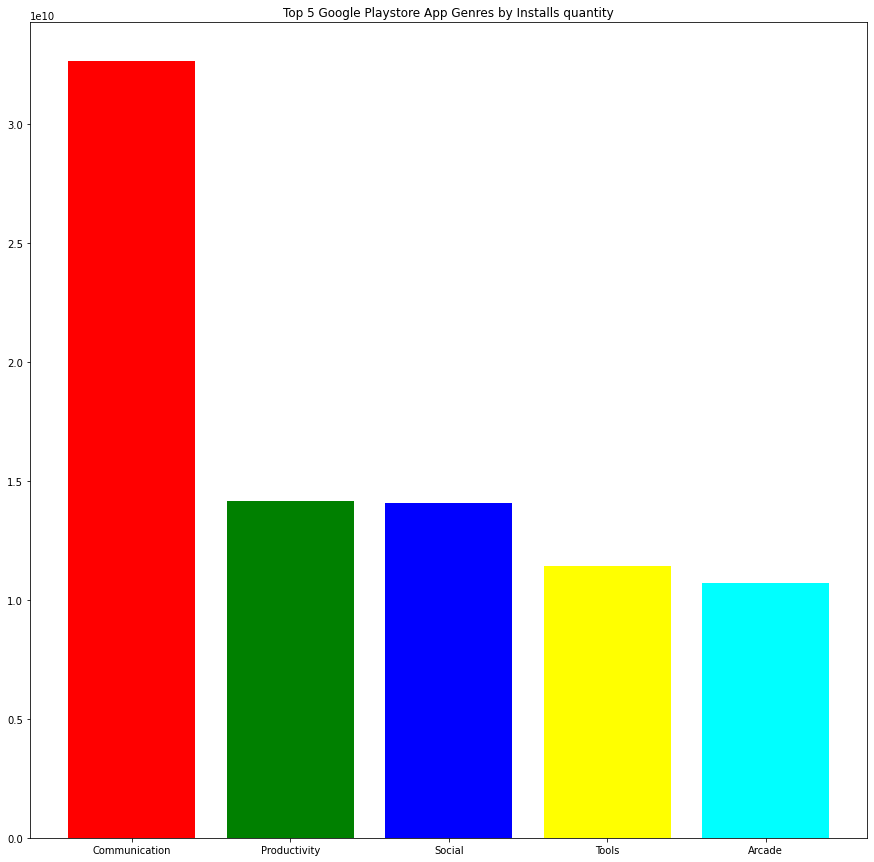

In [15]:
# plotting the bar plot with the top5
plt.figure(figsize=(15,15))
plt.bar(range(len(top_five)), installs, tick_label=genre, color=('red','green','blue','yellow','cyan'))
plt.title("Top 5 Google Playstore App Genres by Installs quantity")
plt.show()

A partir desta primeira análise conseguimos concluir que o top5 géneros de aplicações visando o número de instalações é:
* 1: Comunicação
* 2: Produtividade
* 3: Social
* 4: Ferramentas
* 5: Jogos Arcade

Conclui-se então que as aplicações mais utilizadas são de longe as de Comunicação, tal como “WhatsApp”, “Gmail”, “Hangouts”, entre muitas outras. No entanto é possível também reparar que os géneros da Produtividade, Social, Ferramentas e Jogos Arcade encontram-se bastante equilibrados em popularidade.

A segunda análise feita foi ao número de instalações face às restrições de conteúdo.

In [16]:
# Imports
import pandas as pd
from heapq import nlargest
import matplotlib.pyplot as plt

In [19]:
# Reading data and initializing dictionary
apps_data = pd.read_csv(r'C:\ProjetoIDS\googleplaystore.csv')
apps_data.head()

restrictions_installs = {}

In [20]:
# Turning Restrictions and Installs data into a dictionary to be analysed
for i in range(len(apps_data["Installs"])):
    if not apps_data["Content Rating"][i] in restrictions_installs:
        restrictions_installs[apps_data["Content Rating"][i]] = 1
    else:
        restrictions_installs[apps_data["Content Rating"][i]] += 1

In [21]:
# Saving the top5 into a new dictionary
restrictions_installs = {j: i for i, j in restrictions_installs.items()}
top_five = dict(nlargest(5, restrictions_installs.items()))
top_five = {z: y for y, z in top_five.items()}

restriction = list(top_five.keys())
installs = list(top_five.values())

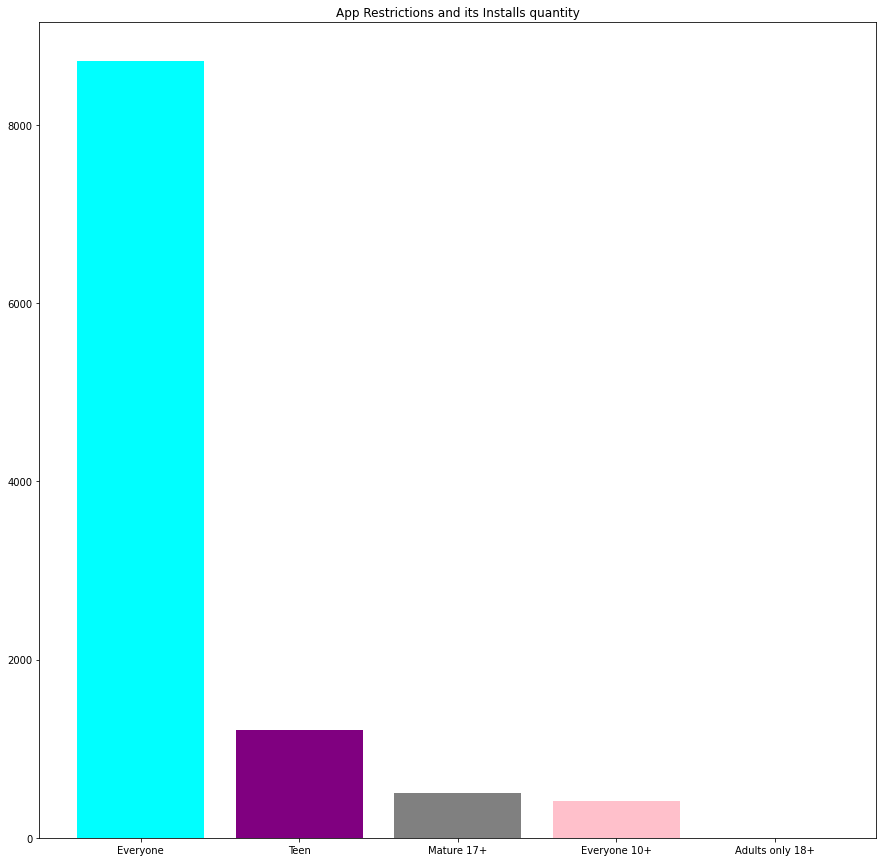

In [22]:
# plotting the bar plot with the top5
plt.figure(figsize=(15, 15))
plt.bar(range(len(top_five)), installs, tick_label=restriction, color=('cyan', 'purple', 'grey', 'pink', 'red'))
plt.title("App Restrictions and its Installs quantity")
plt.show()

A partir desta primeira análise conseguimos concluir que o top5 tipo de apps de acordo com as restrições de conteúdo visando o número de instalações é:
* 1: Para todos
* 2: Adolescentes
* 3: 17 anos +
* 4: 10 anos +
* 5: Apenas adultos 18+
Com isto conclui-se que as aplicações com mais sucesso são as que tem público-alvo de idades mais generalizadas e as segundas com maior sucesso (embora bastante menos que as de alvo mais generalizado) são as que têm público-alvo de idades a partir da adolescência.

Por fim, a última análise foi ao top de aplicações de acordo com o número de instalações, independentemente do género, disponíveis na Google Play Store.

In [23]:
# Imports and fix for warning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [24]:
# Reading data and initializing list
apps_data = pd.read_csv(r'C:\ProjetoIDS\googleplaystore.csv')
apps_data.head()

top_installs = []

In [25]:
# Removing "," and "+" from the Installs data so we can use them
for i in range(len(apps_data["Installs"])):
    apps_data["Installs"][i] = apps_data["Installs"][i].replace(',','')
    apps_data["Installs"][i] = apps_data["Installs"][i].replace('+', '')

In [26]:
# As the maximum number of installs is 1,000,000,000+ according to the database in use, we search for apps with that
# number of installs
for i in range(len(apps_data["Installs"])):
    if(apps_data["Installs"][i]) == '1000000000':
        top_installs += [apps_data["App"][i],]

In [27]:
# remove repeated app names
set = set(top_installs)
top = list(set)

In [28]:
# create dictionary with all app names and according value of installs
top_dict = {k:'1,000,000,000+' for k in top}

In [29]:
# Turning dictionary into one list of lists of App Name and according installs value
app_names = list(top_dict.keys())
app_install_values = list(top_dict.values())
together = []
for i in range(len(app_names)):
    together += [[app_names[i], app_install_values[i]],]

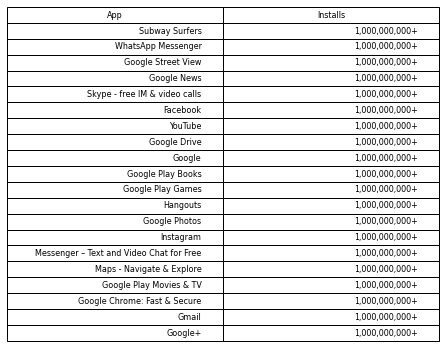

In [41]:
# Prepare everything to plot table
column_labels = ["App", "Installs"]

fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# convert into numpy array so we can plot a table
clust_data = np.asarray(together)

# Table
collabel=("App", "Installs")
ax.table(cellText=clust_data,colLabels=collabel,loc='center')
ax.axis('off')
plt.subplots_adjust(left=0,right=1,top=1,bottom=0)
plt.show()

Analisando as top apps da Google Play Store é fácil concluir que a Google domina o espetro de Apps, contando 14 Apps do top20. (Para além das intituladas “Google…” é necessário verificar que também a App “Hangouts”, “Youtube” e “Maps – Navigate & Explore” pertecem à Google.